# Predictive Analysis using Machine Learning

In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
import urllib.request
import json

In [217]:
webdata = urllib.request.urlopen("https://api.thingspeak.com/channels/812711/feeds.json?api_key=YZCCUFGP6YRGO0BO")
response= webdata.read()
mydata=json.loads(response)

In [207]:
df = pd.DataFrame(mydata['feeds']) 
new_df = df.rename(columns={"field1": "temperature", "field2": "humidity"})

# Splitting X and Y into training and test sets 

In [128]:
features = ['entry_id', 'temperature']
X = new_df[features]
X.head()

,entry_id,temperature
0,87,30.00
1,88,30.00
2,89,30.00
3,90,30.00
4,91,30.00


In [129]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(100, 2)


In [130]:
Y = new_df['humidity']
Y.head()

0    64.00
1    64.00
2    64.00
3    64.00
4    64.00
Name: humidity, dtype: object

In [131]:
print(type(Y))
print(Y.shape)

<class 'pandas.core.series.Series'>
(100,)


In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(80, 2) (20, 2) (80,) (20,)


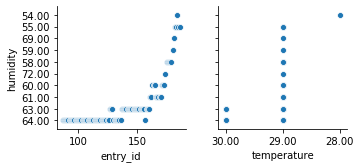

In [193]:
%matplotlib inline
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(new_df, x_vars=['entry_id','temperature'], y_vars='humidity')

# Linear  Regression 

In [133]:
# import the linear regression model
from sklearn.linear_model import LinearRegression
# instantiate the model. Check what parameter are necessary for you.
linreg=LinearRegression()
# fit the model to the training data 
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [134]:
# make predictions on the testing set
y_pred=linreg.predict(X_test)

# Evaluation metrics for linear regression 

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [135]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.4946852866884752


**Accuracy** is defined as:
fraction of correct predictions= $$\frac ct\$$

where,  c = correct predictions and t= total number of data points

In [136]:
lin_score = linreg.score(X_test, y_test)
print(lin_score)

0.5726285784327099


# Random forest

In [224]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 50, random_state = 20)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=20, verbose=0,
                      warm_start=False)

In [225]:
# make predictions on the testing set
y_pred=rf.predict(X_test)

# Evaluation metrics for random forest

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [226]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

2.508840369573161


**Accuracy** is defined as:
fraction of correct predictions= $$\frac ct\$$

where,  c = correct predictions and t= total number of data points

In [227]:
rf_score = rf.score(X_test, y_test)
print(rf_score)

-0.2040707795313239


# K- nearest neighbour

In [214]:
# Import the model we are using
from sklearn.neighbors import KNeighborsClassifier 
# Instantiate model with k = 5
knn = KNeighborsClassifier(n_neighbors=5) 
# Train the model on training data
knn.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [215]:
# make predictions on the testing set
y_pred=knn.predict(X_test)

# Evaluation metrics for k-nearest neighbours

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [216]:
from sklearn import metrics   
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.22360679774997896


**Accuracy** is defined as:
fraction of correct predictions= $$\frac ct\$$

where,  c = correct predictions and t= total number of data points

In [187]:
knn_score = knn.score(X_test, y_test)
print(knn_score)

0.9


# Decision tree


In [182]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(X_train, y_train) 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [183]:
# make predictions on the testing set
y_pred=regressor.predict(X_test)

# Evaulation metrics for decision tree

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [184]:
from sklearn import metrics   
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

3.138470965295043


**Accuracy** is defined as:
fraction of correct predictions= $$\frac ct\$$

where,  c = correct predictions and t= total number of data points

In [185]:
dec_score = regressor.score(X_test, y_test)
print(dec_score)

-0.884265901482544


# Predicting new values of real time 

Since **K-nearest neighbour** model proved to given the best classification model for predicting the humidity based on the performance metrics used. Therefore its chosen to copute values to humidity for new temperature values. 

In [219]:
while True:
    web= urllib.request.urlopen("https://api.thingspeak.com/channels/812711/feeds.json?api_key=YZCCUFGP6YRGO0BO&results=1")
    res= web.read()
    webd=json.loads(res)
    l= len(mydata["feeds"])
    w=webd["feeds"][0]["entry_id"]
    if(mydata["feeds"][l-1]["entry_id"]!= w):
        new = pd.DataFrame(webd["feeds"])
        hum = pd.DataFrame(new, columns =['field2'])
        temp= pd.DataFrame(new, columns=['entry_id', 'field1'])
        hum_pred= knn.predict(temp)
        print("actual humidity", hum)
        print("predicted humidity", hum_pred)
    else:
        continue

actual humidity   field2
0  93.00
predicted humidity [56.18776663]
actual humidity   field2
0  93.00
predicted humidity [56.18776663]
actual humidity   field2
0  93.00
predicted humidity [56.18776663]
actual humidity   field2
0  94.00
predicted humidity [56.12362958]
actual humidity   field2
0  94.00
predicted humidity [56.12362958]
actual humidity   field2
0  94.00
predicted humidity [56.12362958]
actual humidity   field2
0  94.00
predicted humidity [56.12362958]
actual humidity   field2
0  94.00
predicted humidity [56.12362958]
actual humidity   field2
0  94.00
predicted humidity [56.12362958]
actual humidity   field2
0  94.00
predicted humidity [56.12362958]
actual humidity   field2
0  94.00
predicted humidity [56.12362958]


KeyboardInterrupt: 